In [1]:
import pandas as pd
import numpy as np

import math

from scipy.spatial import distance 
from shapleyx import rshdmr
import spotpy as sp

from scipy.stats import qmc

import matplotlib.pyplot as plt

from itertools import combinations

In [2]:
def get_column_labels(n):
    column_labels = []
    for column_index in range(1,n+1):
        column_labels.append('X' + str(column_index)) 
    return column_labels

def ishigami(m):
    n=3
    a=7
    b=0.1
    #a=2
    #b=1
    sampler = qmc.Sobol(d=n, scramble=True, seed=123)
    S = sampler.random_base2(m=m)
    S=S*2*np.pi - np.pi
    Y = np.sin(S[  : ,0]) + a*(np.sin(S[  : ,1])**2) + b*S[  : ,2]**4 * np.sin(S[  : ,0])
    data = pd.DataFrame(S, columns=get_column_labels(n) ) 
    data['Y'] = Y
    return data

    
    

In [3]:
# m = 6 -> 64 samples
# m = 7 -> 128 samples
# m = 8 -> 256 samples
# m = 9 -> 512 samples
# m = 10 -> 1024 samples
# m = 11 -> 2048 samples 
# m = 12 -> 4096 samples
# m = 13 -> 8192 samples

m=8 
dataframe = ishigami(m)
print(len(dataframe), 'samples generated')

256 samples generated


In [4]:
dataframe


,X1,X2,X3,Y
0,0.607133,0.982525,-0.234066,5.415103
1,-1.743749,-2.409093,1.878209,0.919442
2,-0.632661,2.509733,-2.727369,-1.420984
3,1.728958,-1.090534,1.032413,6.605523
4,2.709205,1.710561,3.031147,10.820581
...,...,...,...,...
251,2.735254,-2.982555,-2.262730,1.606913
252,1.751999,0.401357,-0.334536,2.053208
253,-0.609502,-2.220206,1.783863,3.288084
254,-1.720386,2.308941,-2.631478,-1.900112


Found a DataFrame

Transforming data to unit hypercube

X1: min = -3.1390334129985784, max = 3.1305404654960824
X2: min = -3.118307521110561, max = 3.12058376897685
X3: min = -3.123259340813728, max = 3.133173829220537

Building basis functions

Basis functions of 1 order : 30
Basis functions of 2 order : 75
Total basis functions in basis set : 105
Total number of features in basis set is 105

Running regression analysis

running ARD
0 0.42762624110563785 inf
1 0.5726020874468386 33.902467249521976
2 0.7045763148549247 23.048156879158913
3 0.8406099843606603 19.307159017081847
4 0.9396344417080869 11.780071518272683
5 0.9639888480209345 2.5919022581351685
6 0.9771622334080613 1.3665495627020652
7 0.9850612390482538 0.8083617407769701
8 0.9932171332241404 0.8279580855060991
9 0.9968487063744751 0.3656373847021774
10 0.9995357304699002 0.26955184655831715
11 0.9997653620561786 0.022973824674628544
finished
Iteration: 11, number of features in the model: 13
Iteration: 11, number of featur

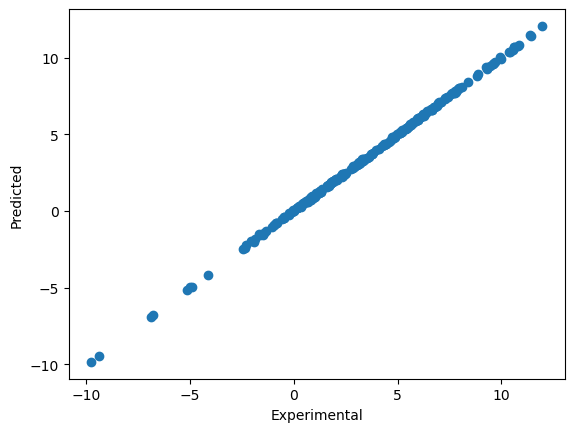


Running bootstrap resampling 1000 samples for 95.0% CI

 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 

Completed bootstrap resampling


                  Completed all analysis
                 ------------------------

Before you put on a frown, make absolutely sure there are
no smiles available.  Jim Beggs



In [5]:

model = rshdmr(dataframe,
               polys = [10, 5],
               n_iter = 250,
               method = 'ard_cv'
              )
               
sob, shap, total = model.run_all() 

In [6]:
all_results =pd.DataFrame()

In [7]:
result3 = model.get_pawnx(1000, 500, 100)
all_results['pawn']= result3['median']

For the Kolmogorov–Smirnov test with alpha = 0.050, the critical value is 0.074
Number of features: 3
Feature 1: Median KS Statistic = 0.217, Std Dev = 0.042
Feature 2: Median KS Statistic = 0.415, Std Dev = 0.095
Feature 3: Median KS Statistic = 0.091, Std Dev = 0.055


In [15]:
all_results['HX']= result1['delta_norm'].values
all_results

,pawn,HX,deltaX,total,shap
X1,0.217,0.487544,NaN,NaN,NaN
X2,0.4155,0.225028,NaN,NaN,NaN
X3,0.091,0.287428,NaN,NaN,NaN


In [16]:
result1 = model.get_hx(1000, 500)
all_results['HX']= result1['delta_norm'].values

result2 = model.get_deltax(1000, 500)
all_results['deltaX']= result2['delta_norm'].values

Number of features: 3
Feature X1: Expectation value of delta Statistic = 1.187
Feature X2: Expectation value of delta Statistic = 0.577
Feature X3: Expectation value of delta Statistic = 0.726
Number of features: 3
Feature X1: Expectation value of delta Statistic = 0.448
Feature X2: Expectation value of delta Statistic = 0.762
Feature X3: Expectation value of delta Statistic = 0.339


In [17]:
all_results['total']= total['total'].values

In [18]:
all_results['shap']= shap['scaled effect'].values

In [19]:
all_results

,pawn,HX,deltaX,total,shap
X1,0.217,0.476658,0.289128,0.553458,0.433329
X2,0.4155,0.231620,0.492139,0.446360,0.446441
X3,0.091,0.291722,0.218733,0.240415,0.120230


In [20]:
model.get_pawn()

,minimum,mean,median,maximum,CV,stdev
X1,0.173678,0.267370,0.283996,0.360625,0.264597,0.070745
X2,0.192656,0.377558,0.416767,0.606671,0.308789,0.116586
X3,0.129808,0.198563,0.192969,0.260216,0.212425,0.042180


In [22]:
sob

,derived_labels,index,lower,upper
0,X1,0.313042,0.311407,0.314512
1,X1_X3,0.240415,0.238904,0.241816
2,X2,0.446360,0.444705,0.448242


In [32]:
import numpy as np
from scipy.stats import gaussian_kde

def kl_divergence_kde(samples_p, samples_q, epsilon=1e-10, num_points=1000):
    """
    Compute KL(P || Q) where P and Q are KDEs estimated from samples_p and samples_q.
    
    Args:
        samples_p: 1D array of samples from distribution P
        samples_q: 1D array of samples from distribution Q
        epsilon: Small value to avoid numerical issues
        num_points: Number of evaluation points for numerical integration
        
    Returns:
        KL divergence value
    """
    # Fit KDEs to the samples
    kde_p = gaussian_kde(samples_p)
    kde_q = gaussian_kde(samples_q)
    
    # Define evaluation points spanning both datasets
    min_val = min(np.min(samples_p), np.min(samples_q)) - 1.0
    max_val = max(np.max(samples_p), np.max(samples_q)) + 1.0
    grid_points = np.linspace(min_val, max_val, num_points)
    
    # Evaluate KDEs (add epsilon to avoid zeros)
    p = kde_p(grid_points) + epsilon
    q = kde_q(grid_points) + epsilon
    
    # Normalize to ensure valid probability distributions
    p /= np.trapz(p, grid_points)
    q /= np.trapz(q, grid_points)
    
    # Compute KL divergence: ∫ p(x) * log(p(x)/q(x)) dx
    kl_integrand = p * (np.log(p) - np.log(q))
    kl = np.trapz(kl_integrand, grid_points)
    
    return kl

# Example usage
if __name__ == "__main__":
    # Generate sample data
    np.random.seed(0)
    samples_p = np.random.normal(loc=0, scale=1, size=1000)  # P ~ N(0,1)
    samples_q = np.random.normal(loc=0.5, scale=1.2, size=1000)  # Q ~ N(0.5,1.2)
    
    # Compute KL divergence
    kl_pq = kl_divergence_kde(samples_p, samples_q)
    kl_qp = kl_divergence_kde(samples_q, samples_p)  # Asymmetric result
    
    print(f"KL(P || Q) = {kl_pq:.4f}")
    print(f"KL(Q || P) = {kl_qp:.4f}  (asymmetric!)")

KL(P || Q) = 0.1355
KL(Q || P) = 0.2424  (asymmetric!)
